# **Módulo de Clasificación**
* Un proceso de clasificación probando diferentes técnicas de Inteligencia Artificial (mínimo 5 modelos
diferentes), para el entrenamiento se deberá usar
respuestas.csv y para la validación se usará el archivo
test_data.csv.

Todos los modelos deben ser guardados en un archivo:
### **modelos.ipynb**

In [22]:
import pandas as pd
import missingno as msno

from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,\
     confusion_matrix,classification_report,\
     f1_score,precision_score,recall_score,\
     roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

from joblib import load, dump

In [2]:
#guardamos la ruta del archivo en una variable
file = '/content/drive/MyDrive/datasets/datasets/respuestas_limpio.csv'
df = pd.read_csv(file, header=0, sep=',')
# Usar el método dropna() para eliminar filas con valores nulos
print(df.head(3))
df.dtypes

   Sexo  Edad  Fumador  dedos amarillos  Ansiedad  presion de grupo  \
0   1.0  57.0      1.0              1.0       2.0               2.0   
1   1.0  82.0      2.0              2.0       2.0               2.0   
2   1.0  44.0      1.0              1.0       2.0               2.0   

   enfermedad cronica  fatiga  Alergia  Sibilancias  Consumo Alcohol  Tos  \
0                 1.0     1.0      2.0          1.0              2.0  2.0   
1                 1.0     2.0      2.0          2.0              2.0  1.0   
2                 2.0     2.0      2.0          1.0              1.0  1.0   

   Dificultad respirar  Dificultad tragar  Dolor en pecho  Cancer de pulmon  
0                  2.0                2.0             2.0               2.0  
1                  1.0                2.0             1.0               2.0  
2                  1.0                2.0             2.0               2.0  


Sexo                   float64
Edad                   float64
Fumador                float64
dedos amarillos        float64
Ansiedad               float64
presion de grupo       float64
enfermedad cronica     float64
fatiga                 float64
Alergia                float64
Sibilancias            float64
Consumo Alcohol        float64
Tos                    float64
Dificultad respirar    float64
Dificultad tragar      float64
Dolor en pecho         float64
Cancer de pulmon       float64
dtype: object

In [3]:
features = ['Sexo', 'Edad', 'Fumador', 'dedos amarillos', 'Ansiedad',\
  'enfermedad cronica', 'fatiga','Sibilancias', 'Tos', \
  'Dificultad respirar', 'Dificultad tragar', 'Dolor en pecho']

label = 'Cancer de pulmon'

In [4]:
df['label'] = df[label]
X_train, X_test, y_train, y_test = train_test_split(df[features],\
                               df['label'],test_size=0.1, #0.1
                               random_state=42, stratify=df['label'])
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((8960, 12), (996, 12), (8960,), (996,))

# **MODELO 1 Maquina Soporte Vectorial(SVM):**
* SVM es un algoritmo de aprendizaje supervisado utilizado tanto para clasificación como para regresión.
* Busca encontrar el hiperplano que mejor separa los datos en diferentes clases en un espacio de alta dimensión.
* Se puede utilizar para clasificar datos linealmente separables o no linealesmente separables utilizando diferentes funciones de kernel.

In [8]:
svm = SVC()   #SVC(hiperparametros es lo que le cambia el comportamiento al modelo)
model = svm.fit(X_train, y_train)

predict = model.predict(X_test)
print(model.score(X_test, y_test))
predict

0.5070281124497992


array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

# **MODELO 2 Árboles de Decisión:**
* Los árboles de decisión son un método de aprendizaje supervisado utilizado para problemas de clasificación y regresión.
* Dividen el conjunto de datos en subconjuntos más pequeños basados en características específicas.
Cada nodo interno representa una característica, cada borde representa una regla de decisión y cada hoja representa un resultado.
* Pueden ser fácilmente visualizados y son interpretables, pero pueden ser propensos al sobreajuste.

0.4718875502008032


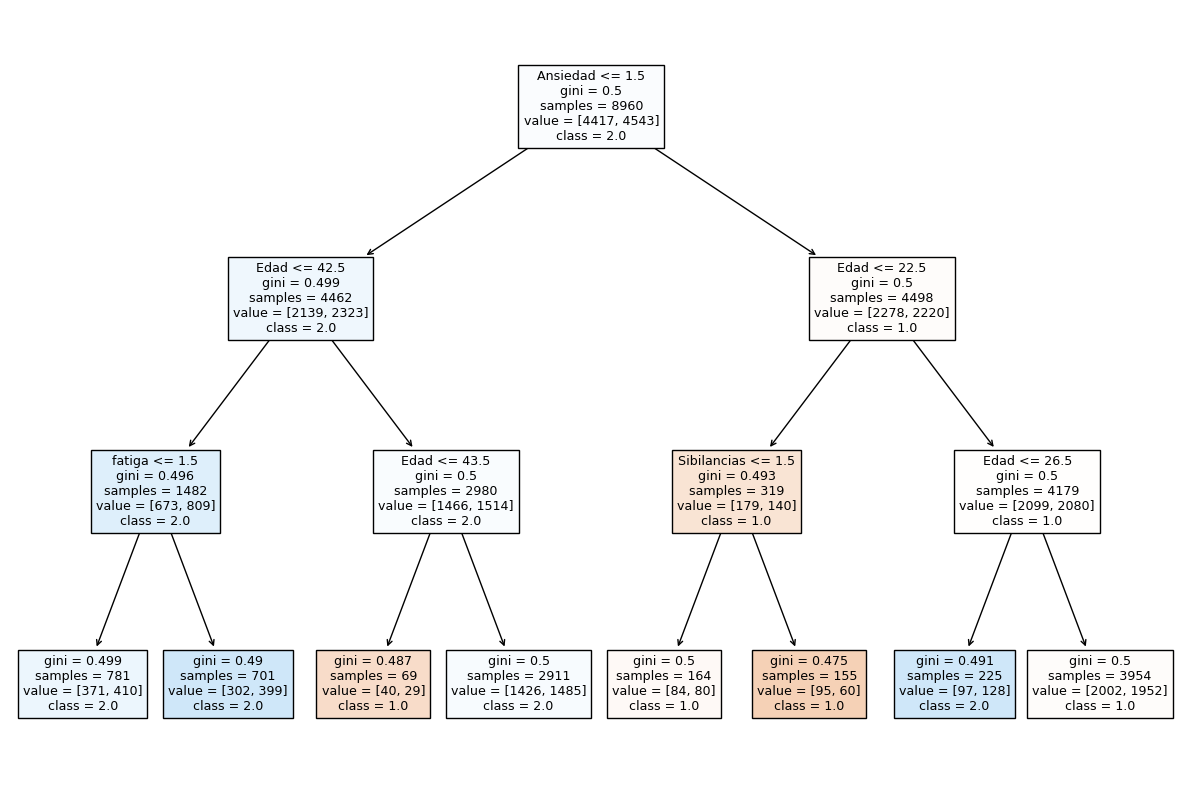

In [17]:
ds = DecisionTreeClassifier(random_state=42,\
                            max_depth=3, criterion='gini') #gini es el predeterminado
model2 = ds.fit(X_train, y_train)
predict2 = model2.predict(X_test)

print(model2.score(X_test, y_test))

# Convertir los nombres de las clases a cadenas de texto
class_names = [str(c) for c in model2.classes_]

plt.figure(figsize=(15, 10))
plot_tree(model2, feature_names=['Sexo', 'Edad', 'Fumador', 'dedos amarillos', 'Ansiedad', \
                                 'enfermedad cronica', 'fatiga', 'Sibilancias', 'Tos', \
                                 'Dificultad respirar', 'Dificultad tragar', 'Dolor en pecho'], \
          class_names=class_names, filled=True)
plt.show()

# **MODELO 3 Random Forest:**
* Random Forest es una técnica de ensamblado que combina múltiples árboles de decisión para realizar clasificación o regresión.
* Cada árbol se entrena en una submuestra aleatoria del conjunto de datos y utiliza una selección aleatoria de características.
* Combina las predicciones de varios árboles para mejorar la precisión y reducir el sobreajuste.


In [18]:
rf = RandomForestClassifier(criterion='gini',max_depth=4)
model3 = rf.fit(X_train, y_train)
predict3 = model3.predict(X_test)
print(model3.score(X_test, y_test))
predict3

0.48092369477911645


array([2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1.,
       2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1.,
       2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1.,
       2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2.,
       2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2.,
       2., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2.,
       1., 2., 2., 1., 2.

# **MODELO 4 Gradient Boosting:**
* Gradient Boosting es un algoritmo de ensamblado que construye múltiples modelos débiles secuencialmente para mejorar la precisión.
* Cada modelo intenta corregir los errores del modelo anterior.
* Se puede utilizar para problemas de clasificación y regresión, y es conocido por su capacidad para manejar datos heterogéneos y de diferentes tipos.

In [19]:
#modelo 4  -->creo que es de los buenos
gb = GradientBoostingClassifier()
model4 = gb.fit(X_train, y_train)
predict4 = model4.predict(X_test)
print(model4.score(X_test, y_test))
predict4

0.49096385542168675


array([2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1.,
       2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1.,
       2., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2.,
       2., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
       2., 2., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1.,
       2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2.,
       2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2.,
       1., 1., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1.,
       2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2.,
       1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1.,
       2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1.,
       1., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2.,
       1., 2., 1., 1., 1.

# **MODELO 5 K-Nearest Neighbors (KNN):**
* KNN es un algoritmo de aprendizaje supervisado utilizado para clasificación y regresión.
* Clasifica un punto de datos basado en la mayoría de votos de sus k vecinos más cercanos.
* Es un algoritmo simple y fácil de entender, pero puede ser computacionalmente costoso en conjuntos de datos grandes y no funciona bien con características irrelevantes o ruidosas.


In [20]:
#modelo 5  tambien uno de los buenos dio 1
# este es el que da 0.60 en cancer de pulmo
knn = KNeighborsClassifier(n_neighbors=2)  # seria 2 para el cancer de pulmon
model5 = knn.fit(X_train, y_train)
predict5 = model5.predict(X_test)
print(model5.score(X_test, y_test))
predict5

0.48694779116465864


array([1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1.,
       1., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
       1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1.,
       2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1.

# **MODELO 6 Naïve Bayes:**
* Los clasificadores Naïve Bayes son un conjunto de algoritmos de aprendizaje supervisado basados en el teorema de Bayes.
* Se basan en la suposición de que las características son independientes entre sí, lo que puede no ser cierto en la práctica.
* Son rápidos y eficientes, especialmente para conjuntos de datos grandes, pero pueden ser afectados negativamente por la dependencia entre las características.

In [21]:
gnv = GaussianNB()
model6 = gnv.fit(X_train, y_train)
predict6 = model6.predict(X_test)
print(model6.score(X_test, y_test))
predict6

0.48895582329317266


array([2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1.,
       2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
       2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.,
       2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2.,
       2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       1., 1., 2., 1., 2.

# **MODELO 7  Voting Classifier:**
* El clasificador de votación es un algoritmo de ensamblado que combina múltiples modelos para realizar clasificación.
* Puede combinar diferentes tipos de modelos (por ejemplo, SVM, árboles de decisión, KNN) para mejorar la precisión general.
* Utiliza la predicción de cada modelo y selecciona la clase que obtiene la mayoría de votos.

In [23]:
modelo_svm = SVC(probability=True)
modelo_arbol = DecisionTreeClassifier()
modelo_knn = KNeighborsClassifier()

voting_clf = VotingClassifier(estimators=[('svm', modelo_svm), ('tree', modelo_arbol),\
                                          ('knn', modelo_knn)], voting='soft')
model7 = gnv.fit(X_train, y_train)
predict7 = model7.predict(X_test)
print(model7.score(X_test, y_test))
predict7

0.48895582329317266


array([2., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1.,
       2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
       2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 1., 2.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.,
       2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2.,
       2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       1., 1., 2., 1., 2.

In [108]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Leer los datos desde el archivo CSV
file = '/content/drive/MyDrive/datasets/datasets/respuestas_limpio.csv'
data = pd.read_csv(file, header=0, sep=',')
#data = pd.read_csv('datos.csv')

# Codificar las etiquetas de salida
label_encoder = LabelEncoder()
data['Cancer de pulmon'] = label_encoder.fit_transform(data['Cancer de pulmon'])

# Dividir los datos en características y etiquetas
X = data.drop(columns=['Cancer de pulmon'])
y = data['Cancer de pulmon']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,\
                                                    stratify=y)

# Definir un conjunto de datos personalizado para PyTorch
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Crear conjuntos de datos para entrenamiento y prueba
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# DataLoader para cargar los datos en lotes
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Definir la arquitectura del modelo CNN
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.fc1 = nn.Linear(15, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)

# Instanciar el modelo y la función de pérdida
model = CNNClassifier()
criterion = nn.BCELoss()

# Optimizador
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
epochs = 500
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    #print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Evaluación del modelo
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted.squeeze() == labels).sum().item()

print(f"Accuracy: {correct / total}")


Accuracy: 0.5070281124497992
